In [1]:
import snapatac2 as snap
import scanpy as sc
import matplotlib.pyplot as plt

In [6]:
gene_annotation = "/media/chang/HDD-1/reference_cellranger/gencode.v40.primary_assembly.annotation.gff3.gz"

In [7]:
files = [
    "/media/chang/HDD-10/derek/run_folders/cellranger_mkdfastq_outs/H5YGGDRX2/Front_cr/outs/fragments.tsv.gz",
    "/media/chang/HDD-10/derek/run_folders/cellranger_mkdfastq_outs/H5YGGDRX2/Lateral_cr/outs/fragments.tsv.gz",
]
names = ["Frontal","Lateral"]

In [ ]:
#datasets = {}
for fl, name in zip(files, names):
    data = snap.pp.import_data(
        fl,
        gene_annotation,
        snap.genome.hg38,
        sorted_by_barcode = False,
        min_num_fragments = 5000,
        file = "/media/chang/HDD-6/chang/mg/atac/" + name + ".h5ad",
    )
    snap.pp.filter_cells(data, min_tsse = 10)#, min_counts=1000, max_counts=50000)
    snap.pp.make_tile_matrix(data)
    snap.pp.select_features(data)
    snap.pp.scrublet(data)
    snap.pp.call_doublets(data)
    #datasets[name] = data
    #data.close()

In [14]:
datasets = [("Frontal", "/media/chang/HDD-6/chang/mg/atac/Frontal.h5ad"),  
            ("Lateral", "/media/chang/HDD-6/chang/mg/atac/Lateral.h5ad")]

In [15]:
data = snap.create_dataset(datasets, storage = "/media/chang/HDD-6/chang/mg/atac/Frontal_lateral_merged.h5ad")

In [32]:
data = snap.read_dataset("/media/chang/HDD-6/chang/mg/atac/Frontal_lateral_merged.h5ad")

In [17]:
snap.pl.tsse(datasets["Frontal"], show_cells=True, interactive=False)

TypeError: list indices must be integers or slices, not str

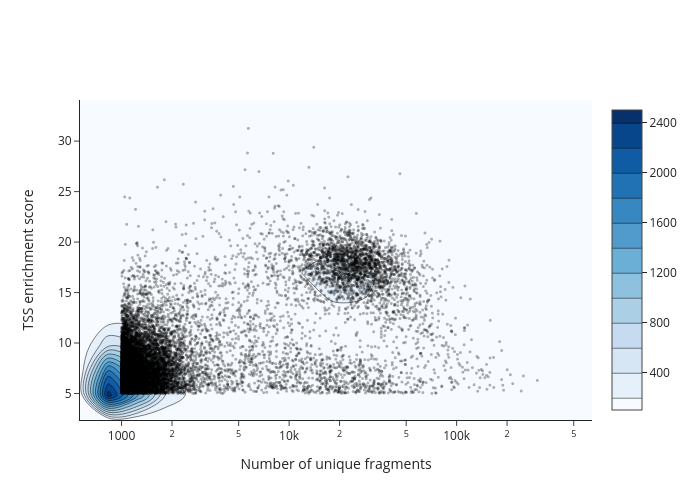

In [11]:
snap.pl.tsse(datasets["Lateral"], show_cells=True, interactive=False)

In [30]:
#data = data[data.obs["is_doublet"] == False]
data

AnnDataSet object with n_obs x n_vars = 6337 x 6176550 backed at '/media/chang/HDD-6/chang/mg/atac/Frontal_lateral_merged.h5ad'
contains 2 AnnData objects with keys: Frontal, Lateral
    obs: Cell, sample
    var: Feature_ID, selected
    uns: AnnDataSet

In [34]:
snap.pp.select_features(data, blacklist="/home/chang/ENCFF356LFX.bed")

In [35]:
snap.tl.spectral(data, sample_size=10000)

thread '<unnamed>' panicked at 'cannot convert python type '<class 'tuple'>' to indices', /home/chang/.cargo/git/checkouts/anndata-rs-087569d311f7caf2/77f6f68/pyanndata/src/utils.rs:62:9


PanicException: cannot convert python type '<class 'tuple'>' to indices

In [ ]:
snap.pl.spectral_eigenvalues(data, interactive=False)

In [ ]:
data = data.to_adata()

In [ ]:
# Perform UMAP
snap.tl.umap(data, use_dims = 12)
sc.pl.umap(data, color="batch")

In [ ]:
fragment_file = "/media/chang/HDD-6/chang/mg/GW18_multiome/outs/atac_fragments.tsv.gz"

In [3]:
data = snap.pp.import_data(
    fragment_file,
    gene_annotation,
    snap.genome.hg38,
    sorted_by_barcode = False,
    min_num_fragments = 5000,
    output = '/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad',
    n_jobs = 16
)

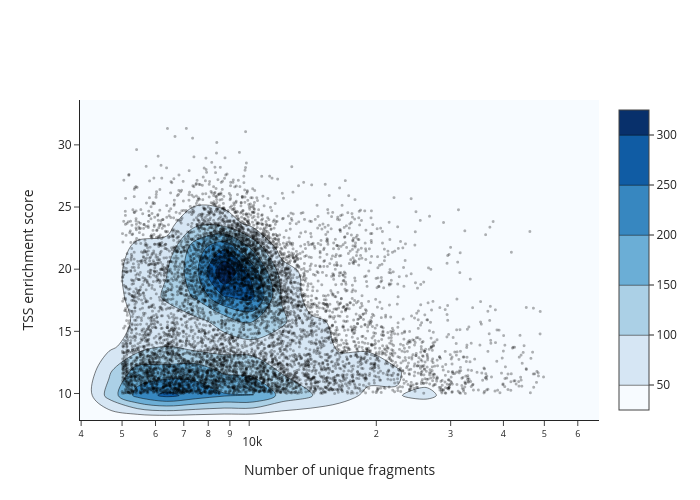

In [3]:
data = snap.read('/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad',backed='r+')
snap.pl.tsse(data, show_cells=True, interactive=False)

In [4]:
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=50000)
data

AnnData object with n_obs × n_vars = 10453 × 0 backed at '/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    obsm: 'base_count'

In [5]:
snap.pp.make_tile_matrix(data)

In [6]:
snap.pp.select_features(data, blacklist="/home/chang/ENCFF356LFX.bed")
data

AnnData object with n_obs × n_vars = 10453 × 6176550 backed at '/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito'
    var: 'selected'
    obsm: 'base_count'

In [7]:
snap.pp.scrublet(data)

Simulating doublets...
Spectral embedding ...
Compute similarity matrix
Normalization
Perform decomposition
Calculating doublet scores...


/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


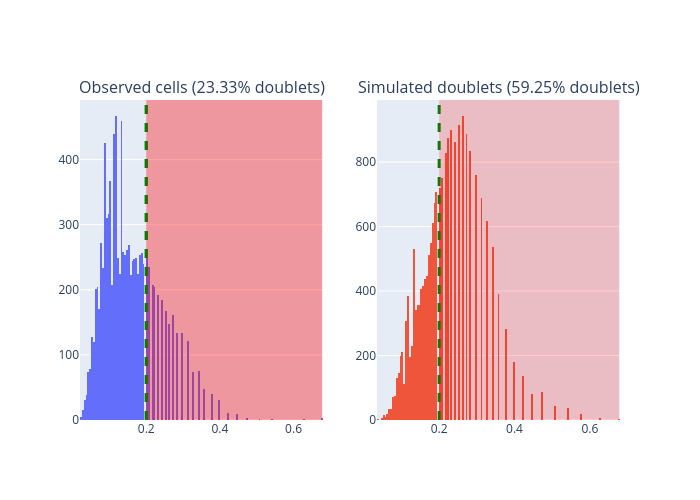

In [8]:
snap.pp.call_doublets(data, .2)
snap.pl.scrublet(data, interactive=False)

In [9]:
data = data[data.obs["is_doublet"] == False]

In [4]:
data

AnnData object with n_obs × n_vars = 8014 × 6176550 backed at '/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_score', 'is_doublet'
    var: 'selected'
    uns: 'scrublet'
    obsm: 'base_count'

In [5]:
snap.tl.spectral(data)

Compute similarity matrix
Normalization
Perform decomposition


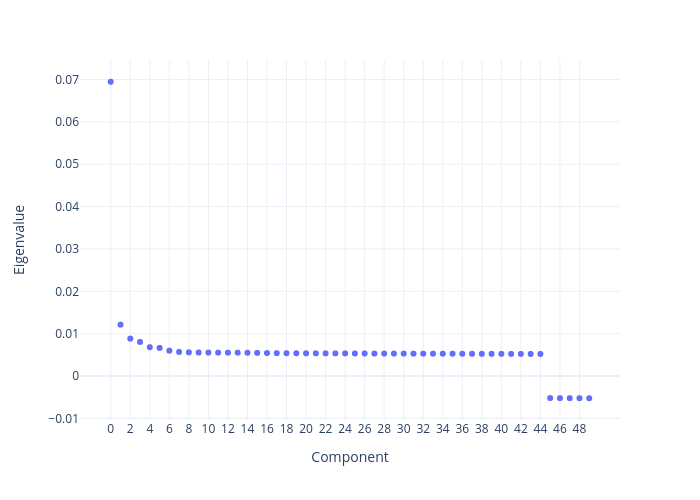

In [6]:
snap.pl.spectral_eigenvalues(data, interactive=False)

In [9]:
snap.tl.umap(data, use_dims=15)

In [10]:
snap.pp.knn(data, use_dims=15)
snap.tl.leiden(data)
snap.tl.leiden(data, objective_function="CPM", resolution=0.035, min_cluster_size=20, key_added="leiden_CPM")
snap.tl.kmeans(data, 12)

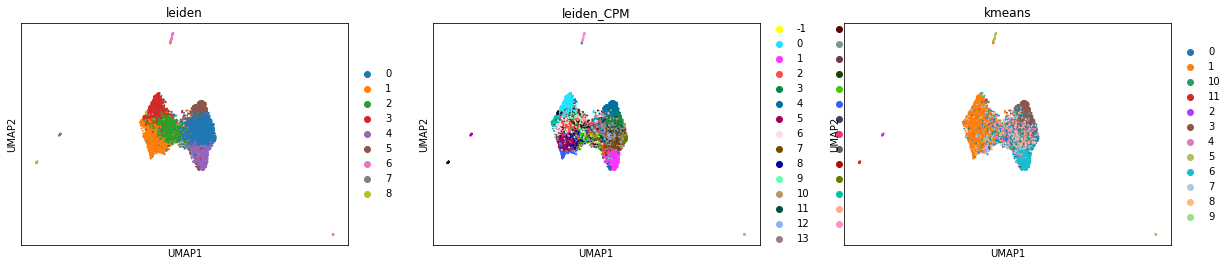

In [11]:
import scanpy as sc
sc.pl.umap(data, color=["leiden", "leiden_CPM", "kmeans"])

In [14]:
gene_matrix = snap.pp.make_gene_matrix(data, gene_annotation)

In [15]:
sc.pp.filter_genes(gene_matrix, min_cells= 5)
sc.pp.normalize_total(gene_matrix)
sc.pp.log1p(gene_matrix)

In [16]:
sc.external.pp.magic(gene_matrix, solver="approximate")

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/magic/utils.py:145: FutureWarning:

X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.



In [17]:
gene_matrix.obsm["X_umap"] = data.obsm["X_umap"]

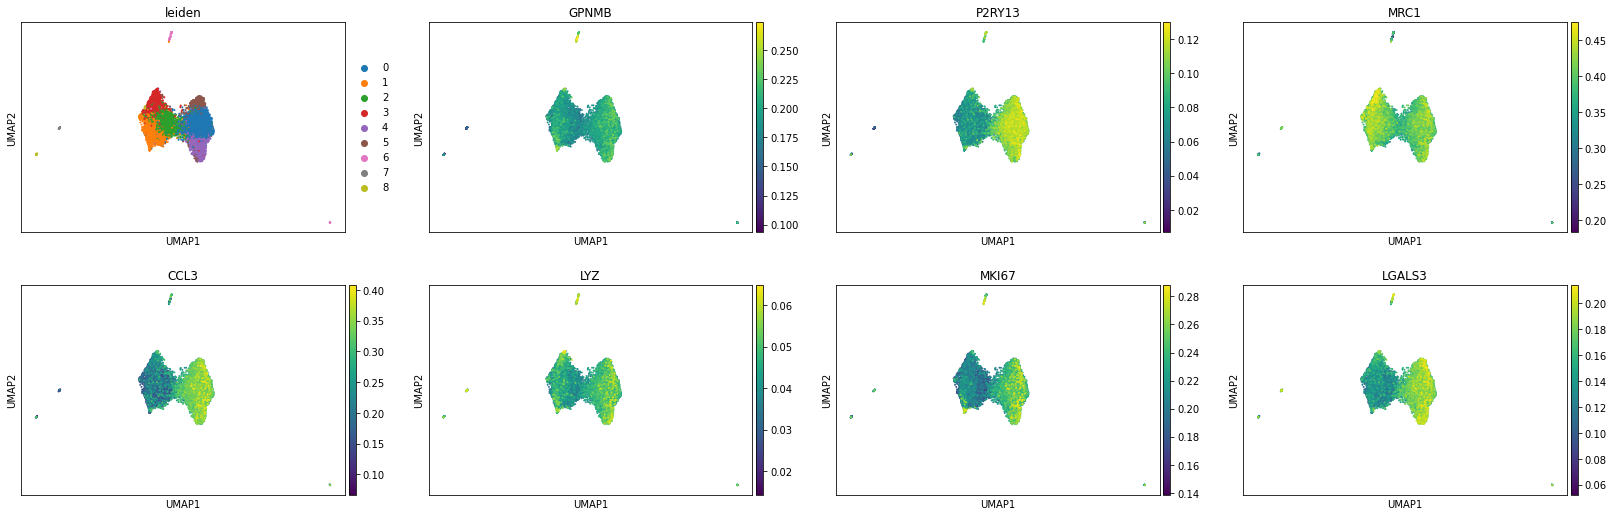

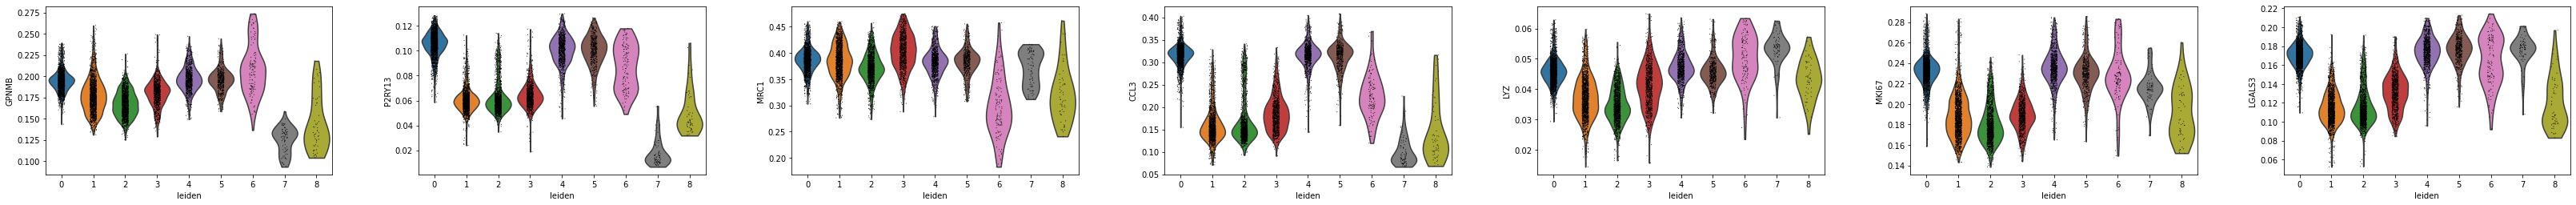

In [20]:
marker_genes = ['GPNMB', 'P2RY13', 'MRC1', 'CCL3', 'LYZ', 'MKI67', 'LGALS3']

sc.pl.umap(gene_matrix, use_raw=False, color=["leiden"] + marker_genes)
sc.pl.violin(gene_matrix, marker_genes, use_raw=False, groupby='leiden')

In [21]:
data

AnnData object with n_obs × n_vars = 8014 × 6176550 backed at '/media/chang/HDD-6/chang/mg/GW18_multiome/outs/data.h5ad'
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_score', 'is_doublet', 'leiden', 'leiden_CPM', 'kmeans'
    var: 'selected'
    uns: 'scrublet', 'spectral_eigenvalue', 'leiden', 'kmeans', 'leiden_colors', 'leiden_CPM_colors', 'kmeans_colors'
    obsm: 'base_count', 'X_spectral', 'X_umap'
    obsp: 'distances'